In [39]:
import matplotlib.pyplot as plt
import json

with open('things.json') as f:
    things = json.load(f)
    
car_thing_names = [thing["name"] for thing in things if "KFZ" in thing['properties']['laneType']]
bike_thing_names = [thing["name"] for thing in things if "Radfahrer" in thing['properties']['laneType']]
foot_thing_names = [thing["name"] for thing in things if "Fußgänger" in thing['properties']['laneType']]
only_bus_thing_names = [thing["name"] for thing in things if "Bus" in thing['properties']['laneType']]

print("Total things: " + str(len(things)))
print("Car things: " + str(len(car_thing_names)))
print("Bike things: " + str(len(bike_thing_names)))
print("Foot things: " + str(len(foot_thing_names)))
print("Only bus things: " + str(len(only_bus_thing_names)))

car_thing_names = set(car_thing_names)
bike_thing_names = set(bike_thing_names)
foot_thing_names = set(foot_thing_names)
only_bus_thing_names = set(only_bus_thing_names)

car_distances = []
bike_distances = []
foot_distances = []
only_bus_distances = []

with open('processed_things_2023_12_12.json') as f:
    processed_things = json.load(f)
    
for thing_name, thing in processed_things.items():
    thing_name_clean = thing_name.replace("_primary", "").replace("_secondary", "")
    for dayIdx in range(7):
        for hourIdx in range(24):
            distance = thing["Metrics"][dayIdx][hourIdx]
            if distance != -1.0:
                added = False
                if thing_name_clean in car_thing_names:
                    added = True
                    car_distances.append(distance)
                if thing_name_clean in bike_thing_names:
                    added = True
                    bike_distances.append(distance)
                if thing_name_clean in foot_thing_names:
                    added = True
                    foot_distances.append(distance)
                if thing_name_clean in only_bus_thing_names:
                    added = True
                    only_bus_distances.append(distance)
                if not added:
                    print("Unknown thing: " + thing_name_clean)

Total things: 19844
Car things: 9589
Bike things: 5421
Foot things: 6375
Only bus things: 1294
Unknown thing: 240_1
Unknown thing: 240_1
Unknown thing: 240_1
Unknown thing: 240_1
Unknown thing: 240_1
Unknown thing: 240_1
Unknown thing: 240_1
Unknown thing: 240_1
Unknown thing: 240_1
Unknown thing: 240_1
Unknown thing: 240_1
Unknown thing: 240_1
Unknown thing: 240_1
Unknown thing: 240_1
Unknown thing: 240_1
Unknown thing: 240_1
Unknown thing: 240_1
Unknown thing: 240_1
Unknown thing: 240_1
Unknown thing: 240_1
Unknown thing: 240_1
Unknown thing: 240_1
Unknown thing: 240_1
Unknown thing: 240_1
Unknown thing: 240_1
Unknown thing: 240_1
Unknown thing: 240_1
Unknown thing: 240_1
Unknown thing: 240_1
Unknown thing: 240_1
Unknown thing: 240_1
Unknown thing: 240_1
Unknown thing: 240_1
Unknown thing: 240_1
Unknown thing: 240_1
Unknown thing: 240_1
Unknown thing: 240_1
Unknown thing: 240_1
Unknown thing: 240_1
Unknown thing: 240_1
Unknown thing: 240_1
Unknown thing: 240_1
Unknown thing: 240_1
Un

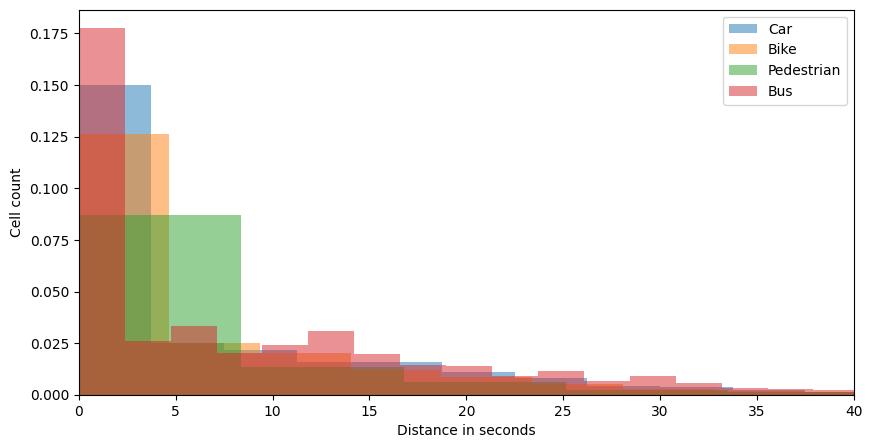

In [39]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(car_distances, bins=100, label='Car', alpha=0.5, density=True)
ax.hist(bike_distances, bins=100, label='Bike', alpha=0.5, density=True)
ax.hist(foot_distances, bins=100, label='Pedestrian', alpha=0.5, density=True)
ax.hist(only_bus_distances, bins=100, label='Bus', alpha=0.5, density=True)
ax.set_xlim([0, 40])
ax.set_xlabel('Distance in seconds')
ax.set_ylabel('Cell count')
ax.legend(loc='upper right')
fig.savefig('studies_charts_lane_type_histogram.png', dpi=300)
plt.show()

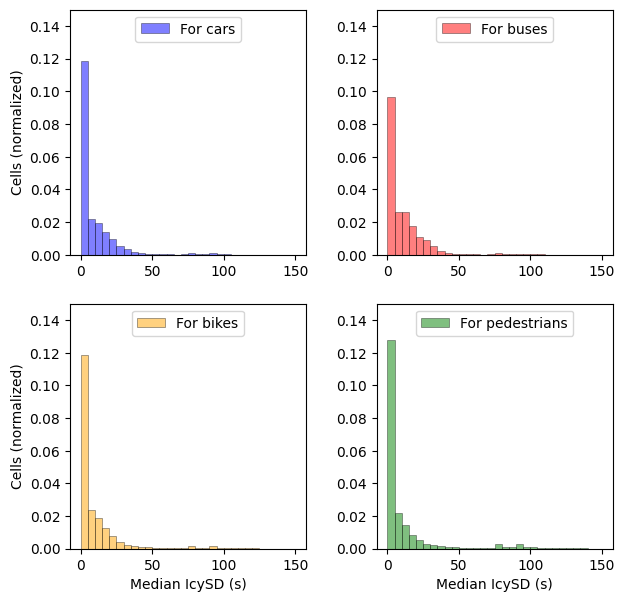

In [42]:
fig = plt.figure(figsize=(7, 7))

gs = fig.add_gridspec(2, 2, width_ratios=(2, 2), height_ratios=(2, 2),
                      wspace=0.3, hspace=0.2)

ylim = [0, 0.15]
x_range = [0, 150]

ax_car = fig.add_subplot(gs[0, 0])
ax_car.hist(car_distances, bins=30, range=x_range, label='For cars', density=True, color='blue', alpha=0.5, linewidth=0.5,  edgecolor='black')
ax_car.set_ylim(ylim)
ax_car.set_ylabel('Cells (normalized)')
ax_car.legend(loc='upper center')


ax_bike = fig.add_subplot(gs[1, 0])
ax_bike.hist(bike_distances, bins=30, range=x_range,  label='For bikes', density=True, color='orange', alpha=0.5, linewidth=0.5,  edgecolor='black')
ax_bike.set_ylim(ylim)
ax_bike.set_xlabel('Median IcySD (s)')
ax_bike.set_ylabel('Cells (normalized)')
ax_bike.legend(loc='upper center')

ax_foot = fig.add_subplot(gs[1, 1])
ax_foot.hist(foot_distances, bins=30, range=x_range, label='For pedestrians', density=True, color='green', alpha=0.5, linewidth=0.5,  edgecolor='black')
ax_foot.set_ylim(ylim)
ax_foot.set_xlabel('Median IcySD (s)')
ax_foot.legend(loc='upper center')

ax_bus = fig.add_subplot(gs[0, 1])
ax_bus.hist(only_bus_distances, bins=30, range=x_range,  label='For buses', density=True, color='red', alpha=0.5, linewidth=0.5,  edgecolor='black')
ax_bus.set_ylim(ylim)
ax_bus.legend(loc='upper center')

fig.savefig('studies_charts_lane_type_histogram_2.pdf', bbox_inches='tight')

plt.show()